# MTF and Linearity

In [2]:
!python3 --version
import sys
sys.path

Python 3.9.1


['/Users/ajpfahnl/Google Drive/__Kadambi/MTF',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.745244803/pythonFiles',
 '/Users/ajpfahnl/.vscode/extensions/ms-toolsai.jupyter-2021.5.745244803/pythonFiles/lib/python',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python37.zip',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/lib-dynload',
 '',
 '/Users/ajpfahnl/.local/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg',
 '/Users/ajpfahnl/miniconda3/envs/MTF/lib/python3.7/site-packages/IPython/extensions',
 '/Users/ajpfahnl/.ipython']

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import rawpy
import numpy as np
import math
from scipy.fft import fft
from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

%load_ext autoreload
%autoreload 2

from MTF import MTF
from ImgLinearity import ImgLinearity

In [37]:
img_dir = "../WeatherNet/dataset5_trailcam/"

img_dict = {1: mpimg.imread(img_dir + "DSCF0005.JPG"), 
    2: mpimg.imread(img_dir + "DSCF0011.JPG"),
    3: mpimg.imread(img_dir + "DSCF0017.JPG"),
    4: mpimg.imread(img_dir + "DSCF0023.JPG"),
    }

(3744, 6656, 3)


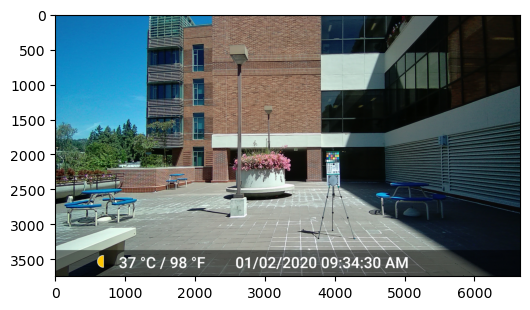

In [63]:
n = 2
image_orig =  img_dict[n]
print(image_orig.shape)
plt.imshow(image_orig)

(141, 140)
0.7368421052631579 pixels per millimeter
36 cycles per quadrant


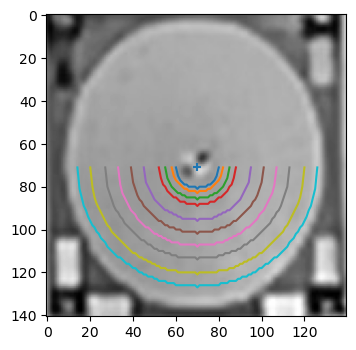

In [64]:
img_params_dict = {
    1: (cv2.cvtColor(img_dict[1],cv2.COLOR_BGR2GRAY)[2375:2675, 4294:4589], ((1, 1) , 0.55)),
    2: (cv2.cvtColor(img_dict[2],cv2.COLOR_BGR2GRAY)[2309:2450, 3906:4046], ((1, 0) , 0.25)),
    3: (cv2.cvtColor(img_dict[3],cv2.COLOR_BGR2GRAY)[2164:2259, 3725:3814], ((1, 0) , 0.16)),
    4: (cv2.cvtColor(img_dict[4],cv2.COLOR_BGR2GRAY)[2240:2306, 3693:3763], ((-1, -1) , 0.115)),
}

image, params = img_params_dict[n]

img_MTF = MTF(image, *params, rs=1)
img_MTF.find_arcs()
img_MTF.display_arcs()


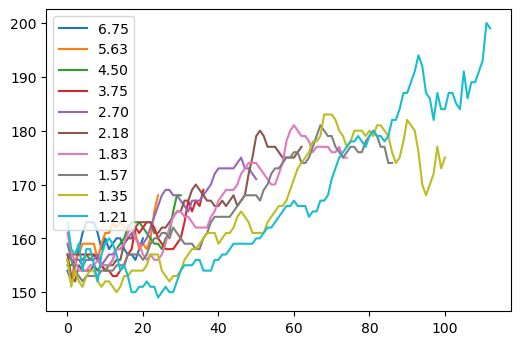

In [65]:
# print("Cycles per millimeter")
# print(img_MTF.freqs)
# print(img_MTF.freqs_orig)

for i, arc in enumerate(img_MTF.arcvals):
    plt.plot(arc, label=f"{img_MTF.freqs[i]:.2f}")
plt.legend()

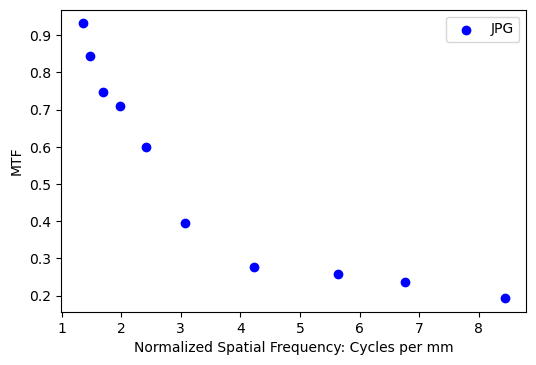

In [56]:
mtfs = img_MTF.arcvals_to_mtfs_old()
freqs = img_MTF.freqs
plt.scatter(freqs, mtfs, color='b', label="JPG")
plt.ylabel("MTF")
plt.xlabel("Normalized Spatial Frequency: Cycles per mm")
plt.legend()

In [8]:
# freqs = np.asarray(freqs)
# mtfs = np.asarray(mtfs)
# reg = LinearRegression().fit(freqs[:, np.newaxis], mtfs)
# mtfs_predlinear = reg.predict(freqs[:, np.newaxis])

# polymodel = make_pipeline(PolynomialFeatures(2), Ridge())
# polymodel.fit(freqs[:, np.newaxis], mtfs)
# x_plot = np.linspace(freqs[0], freqs[-1], 100)
# mtfs_predquad = polymodel.predict(x_plot[:, np.newaxis])

# plt.scatter(freqs, mtfs, color='b')
# plt.plot(freqs, mtfs_predlinear, color='r', label='linear')
# plt.plot(x_plot, mtfs_predquad, color='g', label='quad')
# plt.ylabel("MTF")
# plt.xlabel("Normalized Spatial Frequency: Cycles per mm")

(3744, 6656, 3)


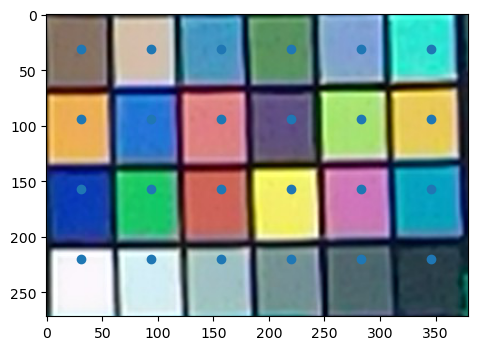

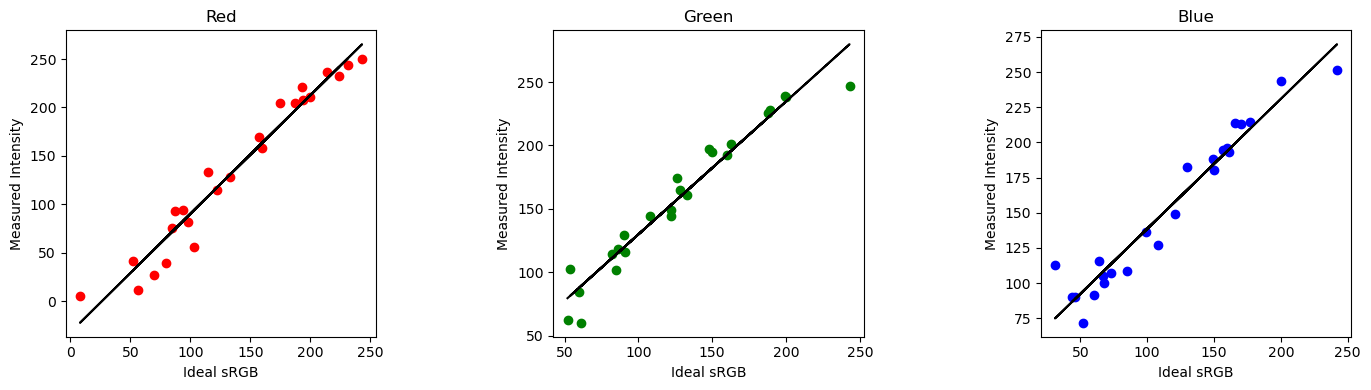

In [24]:
img_color = image_orig
print(img_color.shape)
img_color = img_color[1706:1978, 4237:4617, :]
plt.imshow(img_color)
iml = ImgLinearity(img_color)
plt.scatter(iml.target_locs[:, 0], iml.target_locs[:, 1])
iml.extract_actual(box=20)
iml.plot()